In [33]:
"""
In questo notebook andrò a fare un'analisi esplorativa dei dati (EDA) del dataframe information_data 
"""
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
information_data = pd.read_csv("C:\\Users\\Flavio\\Desktop\\materiali progetto finale Data Analytics\\information_data.csv")

In [31]:
information_data.head()

,read_date,user_uuid,category,journalist_id,language,length,country,subscription_date,platform,article_id,stars
0,19-2-2022,190,sport,117,fr,long,fr,28-6-2021,tablet,331708,2
1,25-2-2021,243,art,117,it,short,it,24-8-2020,tablet,5128,3
2,19-12-2023,36,weather,115,en,long,uk,7-2-2021,tablet,733403,5
3,27-3-2023,162,finance,111,it,short,it,6-9-2022,tablet,612638,1
4,22-10-2023,181,economy,119,fr,short,fr,9-12-2020,tablet,211458,3


In [18]:
information_data.isna().sum()  #verifichiamo i valori nulli 

read_date            0
user_uuid            0
category             0
journalist_id        0
language             0
length               0
country              0
subscription_date    0
platform             0
article_id           0
stars                0
dtype: int64

In [20]:

information_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   read_date          999 non-null    object
 1   user_uuid          999 non-null    int64 
 2   category           999 non-null    object
 3   journalist_id      999 non-null    int64 
 4   language           999 non-null    object
 5   length             999 non-null    object
 6   country            999 non-null    object
 7   subscription_date  999 non-null    object
 8   platform           999 non-null    object
 9   article_id         999 non-null    int64 
 10  stars              999 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 86.0+ KB


In [37]:
# conversione  di alcune colonne in un formato più valido per l'analisi 

information_data['read_date'] = pd.to_datetime(information_data['read_date'], format='%d-%m-%Y', errors='coerce')

information_data['subscription_date'] = pd.to_datetime(information_data['subscription_date'] , format='%d-%m-%Y', errors='coerce')

information_data[['category', 'language', 'lenght', 'country', 'platform']] = information_data[['category', 'language', 'length', 'country', 'platform']].astype('category')


print(information_data.dtypes)
 



read_date            datetime64[ns]
user_uuid                     int64
category                   category
journalist_id                 int64
language                   category
length                       object
country                    category
subscription_date    datetime64[ns]
platform                   category
article_id                    int64
stars                         int64
lenght                     category
dtype: object


In [45]:
#Analizziamo con un grafico il database modificato da cui ho estratto con SQL il maggior numero di arogmenti consultati per paese
 

information_data_sql = pd.read_csv(r'C:\Users\Flavio\Desktop\materiali progetto finale Data Analytics\Database information_data\information_data_SQL.csv')
information_data_sql.head(10) 


,country,category,category_count
0,fr,weather,67
1,fr,sport,42
2,fr,news,30
3,fr,economy,28
4,fr,finance,24
5,fr,lifestyle,15
6,fr,art,13
7,it,weather,165
8,it,sport,79
9,it,finance,65


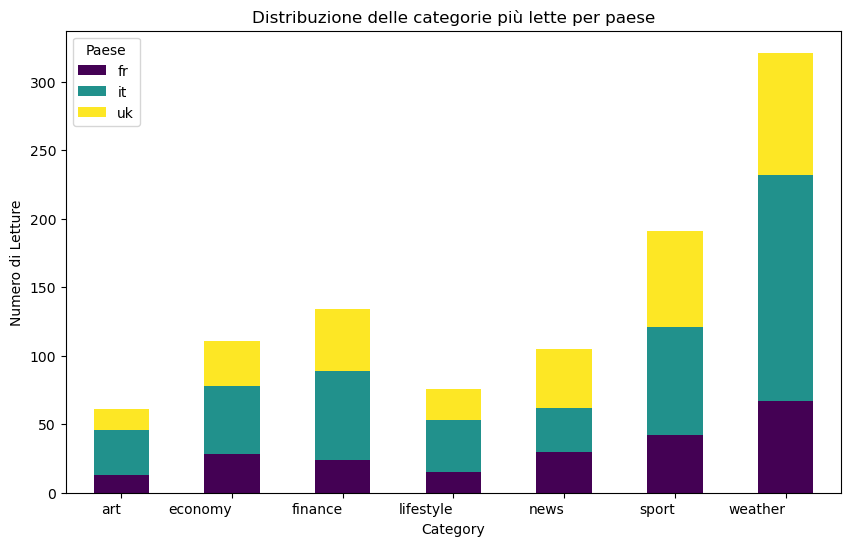

In [153]:

pivot_data = information_data_sql.pivot(index='category', columns='country', values='category_count').fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.xlabel('Category')
plt.ylabel('Numero di Letture')
plt.title('Distribuzione delle categorie più lette per paese')
plt.legend(title='Paese')

plt.xticks(rotation=0, ha='right')

plt.show()





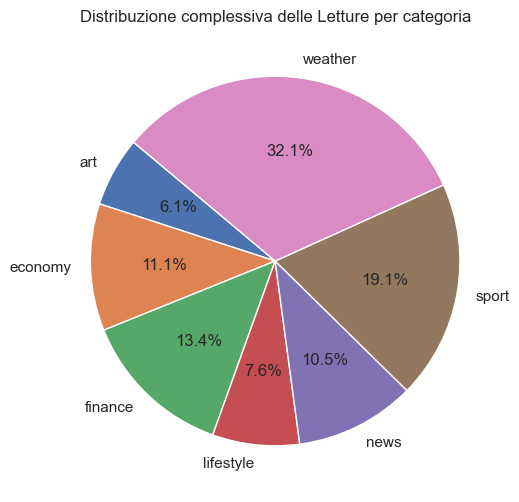

In [65]:
# In questo grafico a torta possiamo le percentuali di preferenza degli argomenti di lettura 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

category_totals = information_data.groupby('category').size()


plt.figure(figsize=(6, 6))
plt.pie(category_totals, labels=category_totals.index, autopct='%1.1f%%', startangle=140)


plt.title("Distribuzione complessiva delle Letture per categoria")
plt.show()



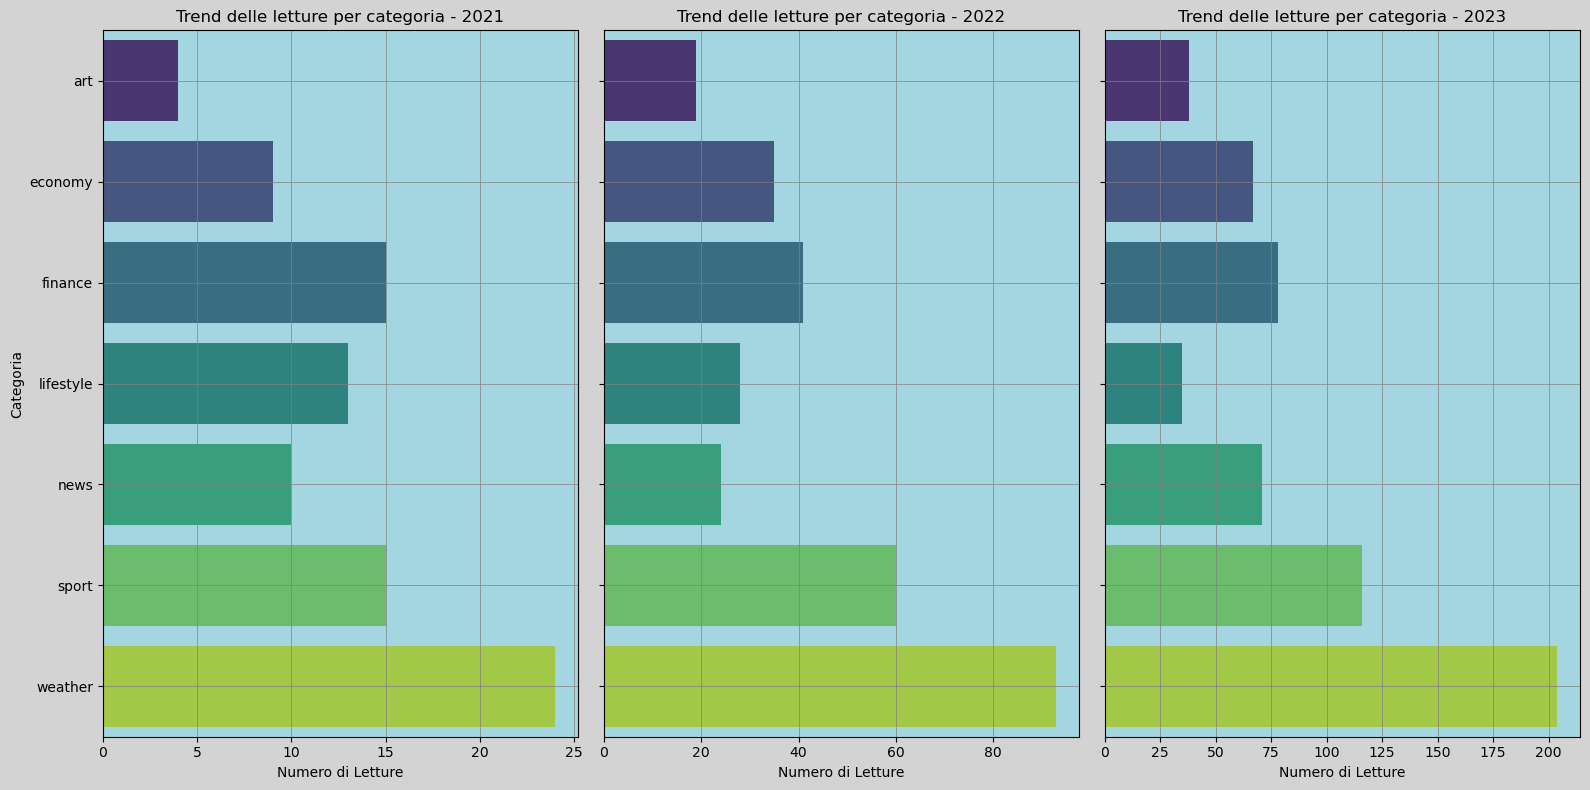

In [109]:
import warnings
import seaborn as sns


warnings.simplefilter(action='ignore', category=FutureWarning)


information_data['read_date'] = pd.to_datetime(information_data['read_date'], errors='coerce')
information_data['year'] = information_data['read_date'].dt.year  # Estraiamo l'anno dalla data


category_trends = information_data.groupby(['year', 'category']).size().reset_index(name='counts')


years = category_trends['year'].dropna().unique()


fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(16, 8), sharey=True)
fig.patch.set_facecolor('lightgrey')  


for i, year in enumerate(sorted(years)):
    yearly_data = category_trends[category_trends['year'] == year]
    sns.barplot(ax=axes[i], data=yearly_data, x='counts', y='category', palette='viridis')
    axes[i].set_title(f"Trend delle letture per categoria - {year}")
    axes[i].set_xlabel("Numero di Letture")
    
    
    axes[i].grid(True, linestyle='-', linewidth=0.5, color='grey')  
    axes[i].set_facecolor('#A4D6E1')  

    if i == 0:
        axes[i].set_ylabel("Categoria")
    else:
        axes[i].set_ylabel("")

plt.tight_layout()
plt.show()



# con questo bar plot possiamo vedere meglio i trend di lettura raggruppate per anno

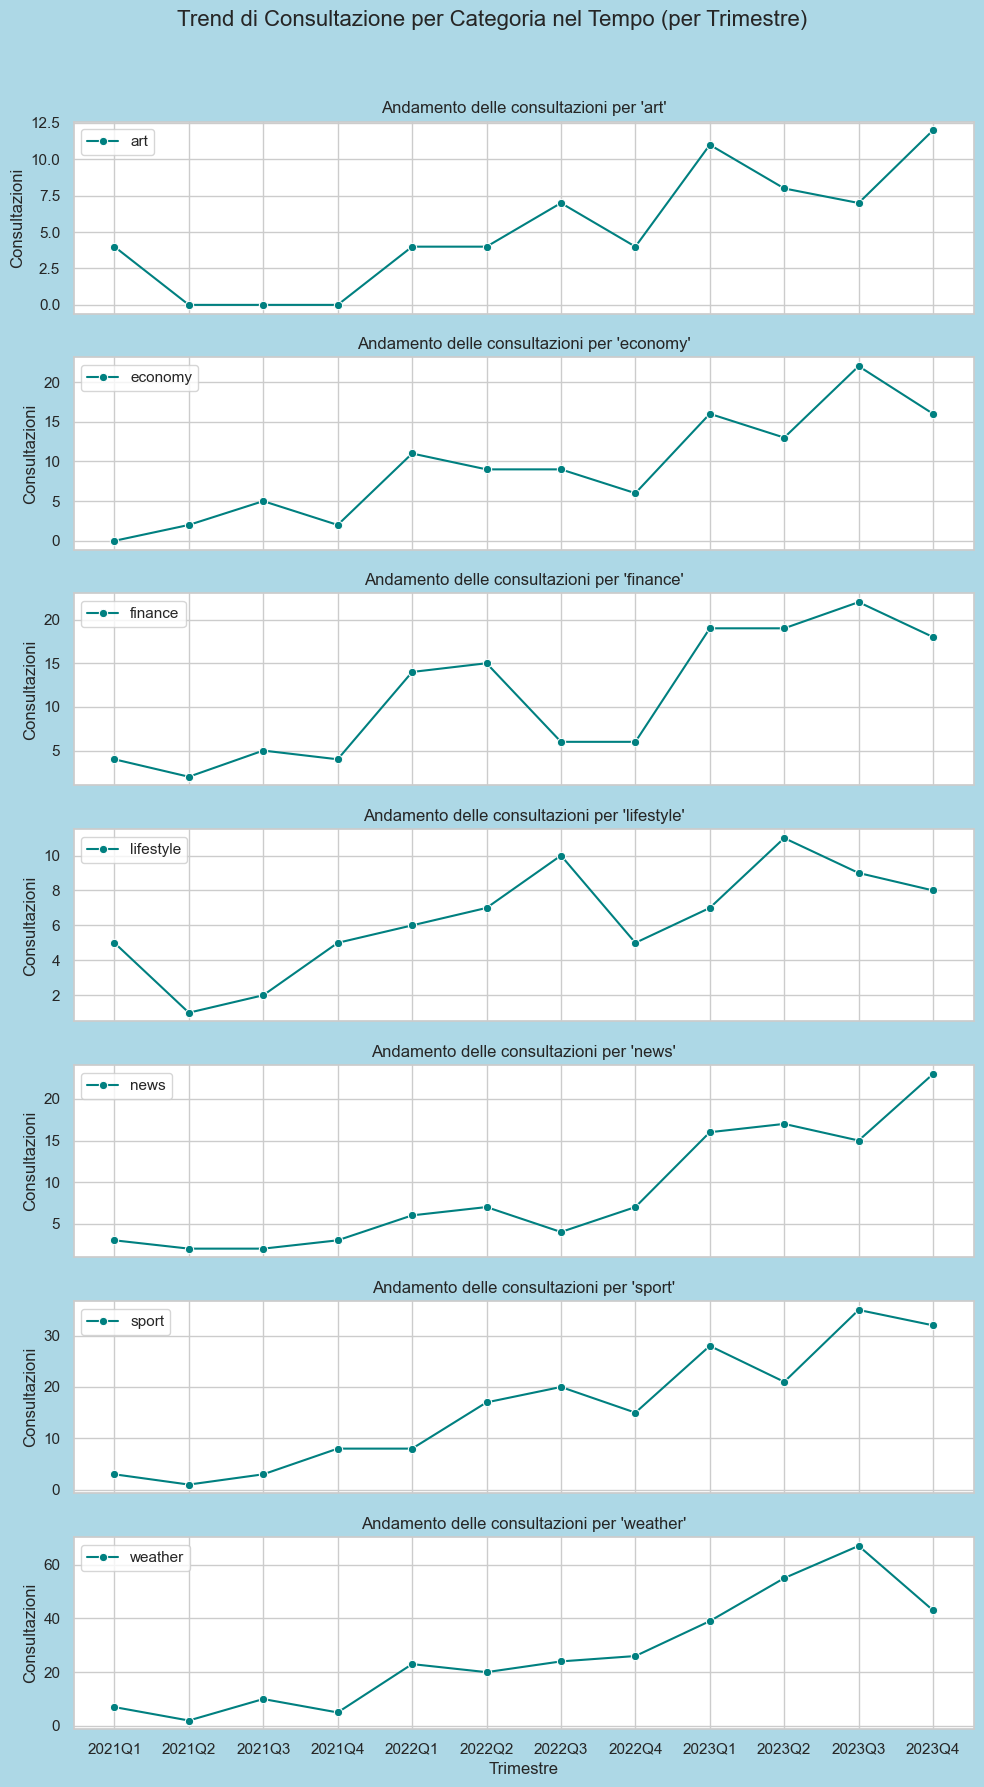

In [67]:
# Con questo grafico di serie temporale possiamo tracciare l'andamento di lettura delle categorie nel corso degli anni 
#andando a suddividere gli anni disponibili in trimestri e convertendo in quartili


import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

warnings.simplefilter(action='ignore', category=FutureWarning)

# Estrazione del trimestre
information_data['quarter'] = information_data['read_date'].dt.to_period('Q')

# Raggruppamento dei dati per trimestre e categoria, contando il numero di consultazioni per ciascuna
category_trends = information_data.groupby(['quarter', 'category']).size().reset_index(name='consultations')




category_trends['consultations'] = category_trends['consultations'].astype(int)


category_trends['quarter'] = category_trends['quarter'].astype(str)


categories = category_trends['category'].unique()

fig, axes = plt.subplots(len(categories), 1, figsize=(10, len(categories) * 2.5), sharex=True, facecolor='lightblue')


for i, category in enumerate(categories):
    category_data = category_trends[category_trends['category'] == category]
    sns.lineplot(
        ax=axes[i], 
        data=category_data, 
        x='quarter', 
        y='consultations', 
        marker='o', 
        label=category,
        color='teal'
    )
    axes[i].set_title(f"Andamento delle consultazioni per '{category}'")
    axes[i].set_ylabel("Consultazioni")
    axes[i].legend(loc="upper left")

# Label per l'asse X
axes[-1].set_xlabel("Trimestre")

# Titolo generale e label
plt.suptitle("Trend di Consultazione per Categoria nel Tempo (per Trimestre)", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()




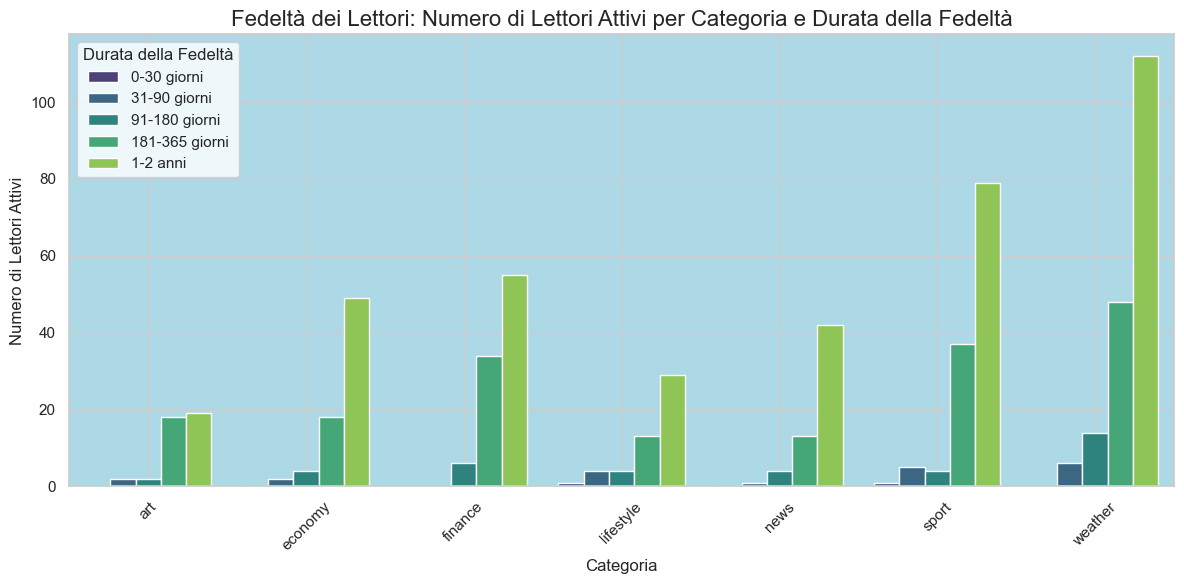

In [99]:
# Ecco un grafico dove viene misurata la fedeltà dei lettori suddivisa in scaglioni temporali in relazione alla categoria di lettura 

import warnings


warnings.simplefilter(action='ignore', category=FutureWarning)


# Calcolo durata in giorni
information_data['loyalty_duration'] = (information_data['read_date'] - information_data['subscription_date']).dt.days


bins = [0, 30, 90, 180, 365, 730]  # Giorni per i diversi intervalli
labels = ['0-30 giorni', '31-90 giorni', '91-180 giorni', '181-365 giorni', '1-2 anni']
information_data['duration_category'] = pd.cut(information_data['loyalty_duration'], bins=bins, labels=labels, right=False)


active_readers_duration_category = information_data.groupby(['category', 'duration_category'])['user_uuid'].nunique().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(data=active_readers_duration_category, x='category', y='user_uuid', hue='duration_category', palette='viridis')


plt.title("Fedeltà dei Lettori: Numero di Lettori Attivi per Categoria e Durata della Fedeltà", fontsize=16)
plt.xlabel("Categoria", fontsize=12)
plt.ylabel("Numero di Lettori Attivi", fontsize=12)
plt.xticks(rotation=45) 

plt.legend(title='Durata della Fedeltà')  
plt.grid(True) 
plt.gca().set_facecolor('lightange')  
plt.tight_layout()  
plt.show()


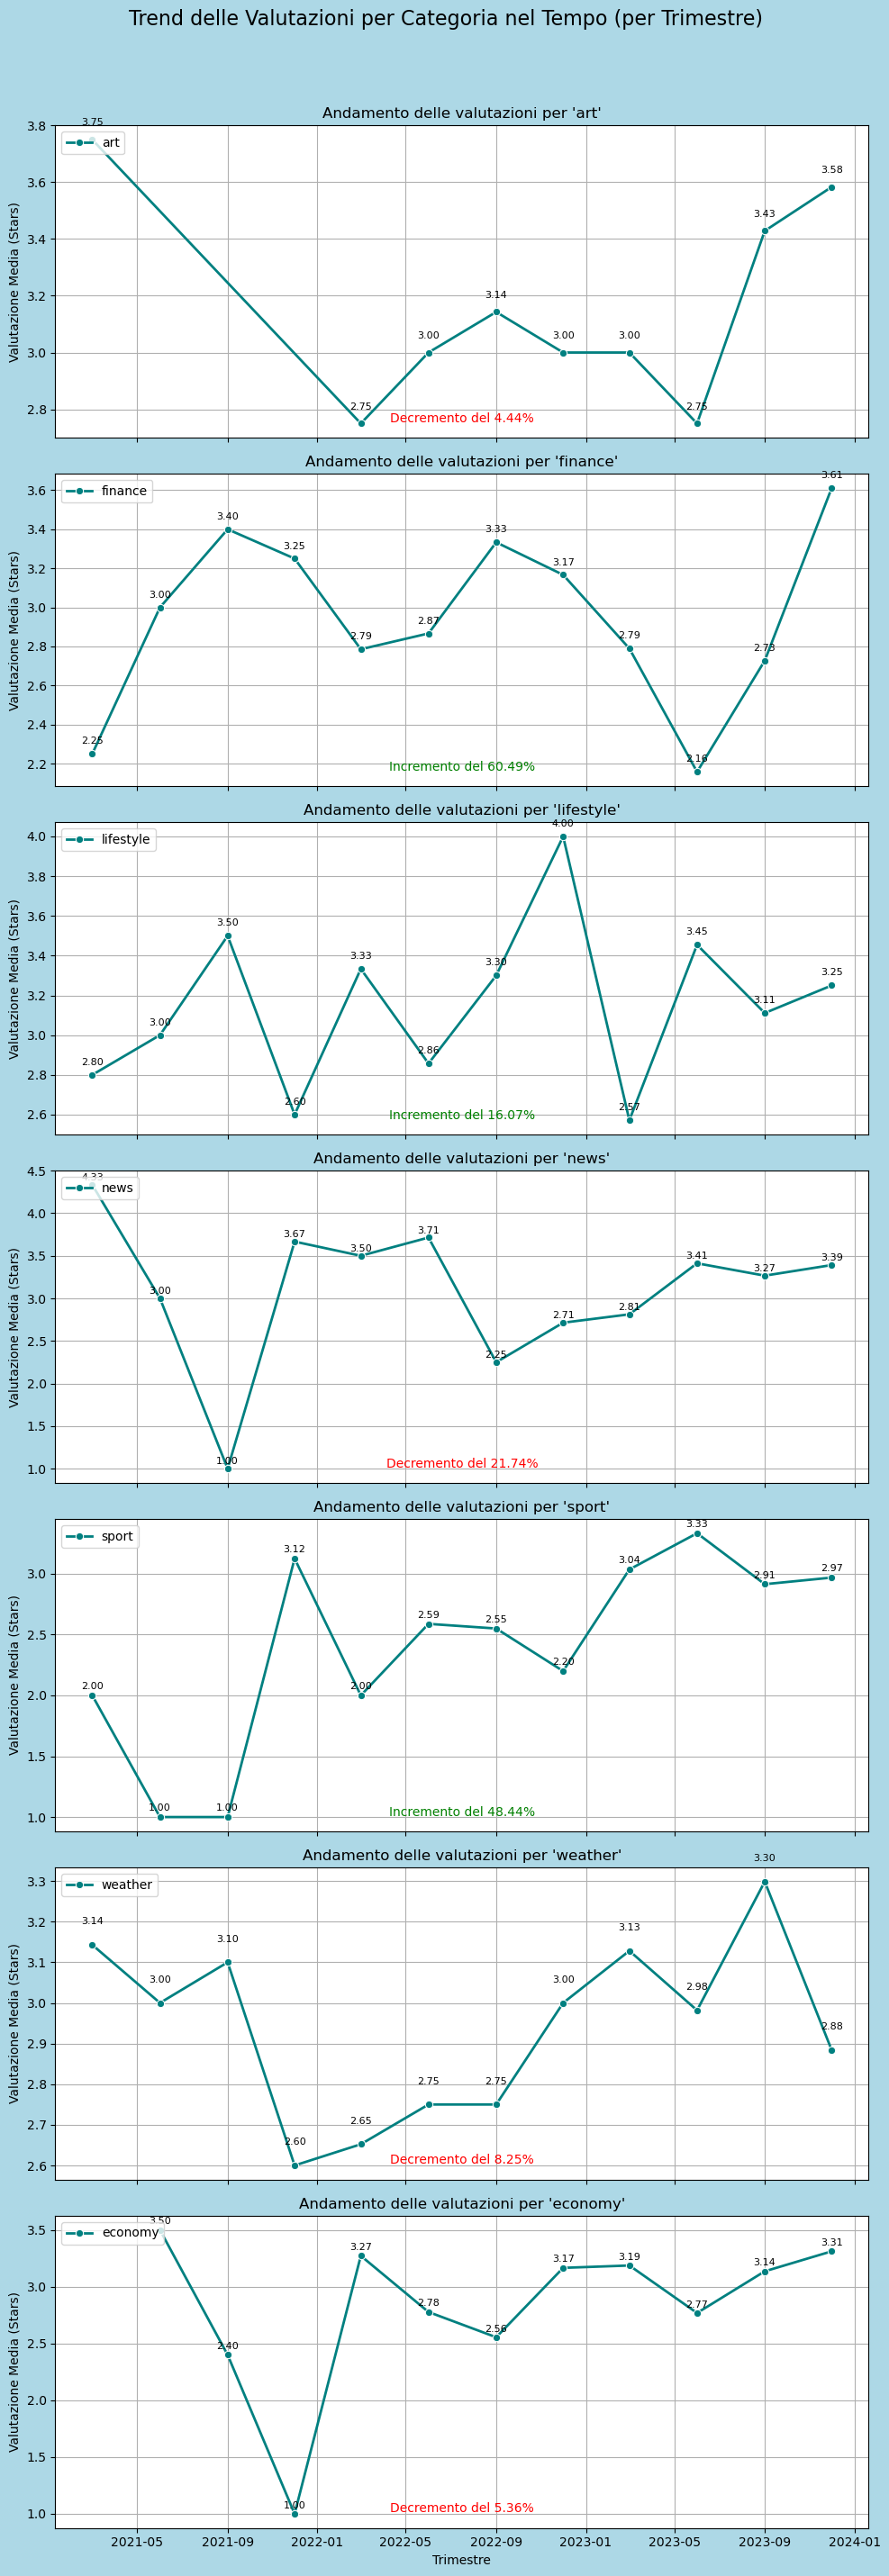

In [52]:
# Infine per ogni categoria vediamo l'andamento medio delle valutazioni che vanno da un minimo di 1 ad un massimo di 5 suddiviso per trimestri dove verrà
# assegnato per ogni picco il valore corrispondente e per ogni categoria la somma complessiva che darà il totale incremento o decremento percentuale  

import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

warnings.simplefilter(action='ignore', category=FutureWarning)



# preferisco convertire di nuovo la colonna in datetime essendo che capita che le modifiche non vengano salvate
information_data['read_date'] = pd.to_datetime(information_data['read_date'], format='%d-%m-%Y')


information_data['quarter'] = information_data['read_date'].dt.to_period('Q').dt.strftime('%Y-%m')

# Raggruppamento dei dati per trimestre e categoria, calcolando la media delle valutazioni
category_trends = information_data.groupby(['quarter', 'category'])['stars'].mean().reset_index()


category_trends['quarter'] = pd.to_datetime(category_trends['quarter'], format='%Y-%m')
category_trends = category_trends.sort_values(by=['quarter'])  # Ordina correttamente per trimestre


categories = category_trends['category'].unique()


fig, axes = plt.subplots(len(categories), 1, figsize=(10, len(categories) * 4), sharex=True, facecolor='lightblue')

for i, category in enumerate(categories):
    category_data = category_trends[category_trends['category'] == category]
    
    
    sns.lineplot(
        ax=axes[i], 
        data=category_data, 
        x='quarter', 
        y='stars', 
        marker='o',  
        label=category,
        color='teal',
        linewidth=2  
    )
    
 
    axes[i].grid(True)

    axes[i].set_title(f"Andamento delle valutazioni per '{category}'")
    axes[i].set_ylabel("Valutazione Media (Stars)")
    axes[i].legend(loc="upper left")

    
    for x, y in zip(category_data['quarter'], category_data['stars']):
        axes[i].text(x, y + 0.05, f"{y:.2f}", fontsize=8, ha='center')  

    # Calcolo incremento/decremento 
    first_value = category_data['stars'].iloc[0]
    last_value = category_data['stars'].iloc[-1]
    change = (last_value - first_value) / first_value * 100  # Calcola della percentuale di cambiamento
    
    if change >= 0:
        change_text = f"Incremento del {change:.2f}%"
        change_color = 'green'  # colore verde per incremento
    else:
        change_text = f"Decremento del {abs(change):.2f}%"
        change_color = 'red'  # colore rosso per decremento
    
    
    axes[i].text(0.5, 0.05, change_text, transform=axes[i].transAxes, fontsize=10, ha='center', color=change_color)

# asse x
axes[-1].set_xlabel("Trimestre")


plt.suptitle("Trend delle Valutazioni per Categoria nel Tempo (per Trimestre)", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

    
    

  
  



   


        
      
